### Srija Uprety

# Is there correlation between reviews and star ratings?

In [451]:
#using bs4 library for web scrapping and requests to extract data from URL
from bs4 import BeautifulSoup
import requests

In [452]:
r = requests.get("https://www.amazon.in/Redgear-Blaze-backlit-keyboard-aluminium/product-reviews/B073QQR2H2/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews")
print(r.url)

https://www.amazon.in/Redgear-Blaze-backlit-keyboard-aluminium/product-reviews/B073QQR2H2/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews


In [453]:
print(r.content)

b'<!doctype html><html lang="en-in" class="a-no-js" data-19ax5a9jf="dingo"><!-- sp:feature:head-start -->\n<head><script>var aPageStart = (new Date()).getTime();</script><meta charset="utf-8"/>\n\n<!-- sp:feature:cs-optimization -->\n<meta http-equiv=\'x-dns-prefetch-control\' content=\'on\'>\n<link rel="dns-prefetch" href="https://images-eu.ssl-images-amazon.com">\n<link rel="dns-prefetch" href="https://m.media-amazon.com">\n<link rel="dns-prefetch" href="https://completion.amazon.com">\n\n<!-- sp:feature:aui-assets -->\n<link rel="stylesheet" href="https://images-eu.ssl-images-amazon.com/images/I/11EIQ5IGqaL._RC|012LjolmrML.css,418YjvsUB+L.css,21qPwhPKAAL.css,01Vctty9pOL.css,017DsKjNQJL.css,0131vqwP5UL.css,41EWOOlBJ9L.css,11TIuySqr6L.css,01ElnPiDxWL.css,11bGSgD5pDL.css,01Dm5eKVxwL.css,01IdKcBuAdL.css,01y-XAlI+2L.css,01ZfXnjPmmL.css,01oDR3IULNL.css,31MKqadzl-L.css,01XPHJk60-L.css,01R0k0yxPXL.css,21xVR0NtxzL.css,11gneA3MtJL.css,21fecG8pUzL.css,01RddH8vm-L.css,01CFUgsA-YL.css,21AmhU6t0s

In [454]:
#By default we have to give HTML parser
soup = BeautifulSoup(r.text, 'html.parser')

#Use prettify to make the HTML code look better.
print(soup.prettify())

<!DOCTYPE html>
<html class="a-no-js" data-19ax5a9jf="dingo" lang="en-in">
 <!-- sp:feature:head-start -->
 <head>
  <script>
   var aPageStart = (new Date()).getTime();
  </script>
  <meta charset="utf-8"/>
  <!-- sp:feature:cs-optimization -->
  <meta content="on" http-equiv="x-dns-prefetch-control"/>
  <link href="https://images-eu.ssl-images-amazon.com" rel="dns-prefetch"/>
  <link href="https://m.media-amazon.com" rel="dns-prefetch"/>
  <link href="https://completion.amazon.com" rel="dns-prefetch"/>
  <!-- sp:feature:aui-assets -->
  <link href="https://images-eu.ssl-images-amazon.com/images/I/11EIQ5IGqaL._RC|012LjolmrML.css,418YjvsUB+L.css,21qPwhPKAAL.css,01Vctty9pOL.css,017DsKjNQJL.css,0131vqwP5UL.css,41EWOOlBJ9L.css,11TIuySqr6L.css,01ElnPiDxWL.css,11bGSgD5pDL.css,01Dm5eKVxwL.css,01IdKcBuAdL.css,01y-XAlI+2L.css,01ZfXnjPmmL.css,01oDR3IULNL.css,31MKqadzl-L.css,01XPHJk60-L.css,01R0k0yxPXL.css,21xVR0NtxzL.css,11gneA3MtJL.css,21fecG8pUzL.css,01RddH8vm-L.css,01CFUgsA-YL.css,21AmhU6t0s

In [455]:
#removing \n from all titles
#1. strip() :- This method is used to delete all the leading and trailing characters mentioned in its argument.
#2. lstrip() :- This method is used to delete all the leading characters mentioned in its argument.



In [456]:
review_description = soup.findAll("span", {"class" : "review-text-content"})
Description = []
for i in range(0, len(review_description)):
    Description.append(review_description[i].get_text())
    # We will remove the '\n' from before and after of every Review Desciption
Description[:] = [i.lstrip('\n').rstrip('\n') for i in Description]

print(Description)




["  The  keyboard quality is great at this budget point. The lighting features  are also good. Keyboard feels  sturdy, though slightly heavy. For gaming,  this is perfect  as you wouldn't notice much the lettering on the keys. But there are  certain aspects that annoy me a lot.1. The printing on the numbers are too bad and you  won't be even able to read them without turning the backlight on.2. The lighting of the NUM, Caps and Windows  lock keys are way too bright that it hurts the eyes3. The  biggest concern till now is double spacing. While writing this review itself, I was able  to get 10+ errors for double  spacing, still  you cannot do anything  about it. That's very irritating. I am not even going to edit those spaces so that you can see the result yourself.I would recommend  to spend some extra bucks for  a better gaming keyboard. I'm stuck  with this for now.,", "  It's a decent keyboard with some good premium features. The build quality is quite good. considering it's low pri

In [457]:

Product_Rating = soup.findAll("i", {"class" : "review-rating"})     # find <i> element with attributes class = review-rating

# Extract name from span tag
Rating = []
for i in range(2,len(Product_Rating)):     # Loop is initiated from 2 because we have to exclude the Top Positive and Top Critical Review which otherwise will get repeated.
    Rating.append(Product_Rating[i].get_text())
    
print(Rating)

['2.0 out of 5 stars', '5.0 out of 5 stars', '3.0 out of 5 stars', '1.0 out of 5 stars', '2.0 out of 5 stars', '1.0 out of 5 stars', '3.0 out of 5 stars', '5.0 out of 5 stars', '5.0 out of 5 stars', '4.0 out of 5 stars']


In [458]:

import pandas as pd

In [459]:
#dataframes carry many additional useful functionalities at the cost of clarity and performance.
data = pd.DataFrame()


In [460]:
#adding info in dataframe

data["Review by Customers"] = Description
data["Star Ratings"] = Rating
data

,Review by Customers,Star Ratings
0,The keyboard quality is great at this budge...,2.0 out of 5 stars
1,It's a decent keyboard with some good premiu...,5.0 out of 5 stars
2,While the keyboard quality is very good and ...,3.0 out of 5 stars
3,Your browser does not support HTML5 video.\n...,1.0 out of 5 stars
4,I expected more from this keyboard.. My big...,2.0 out of 5 stars
5,Ok so guys I am not gonna lie about anything...,1.0 out of 5 stars
6,"Pros: 1. Looks good,2. Aluminium build,Cons:...",3.0 out of 5 stars
7,Whatever everyone says about this keyboard o...,5.0 out of 5 stars
8,"Soon after receiving it, I plugged it in imm...",5.0 out of 5 stars
9,Received the product within 24 hours of orde...,4.0 out of 5 stars


In [461]:
#data cleaning

In [462]:
#removing punctuations from the data
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [463]:
#we will build our own function to remove the punctuation
def remove_punctuation(txt):
    txt_nopunct = "".join([c for c in txt if c not in string.punctuation])
    return txt_nopunct


In [464]:
data['clean review'] = data['Review by Customers'].apply(lambda x: remove_punctuation(x))
data

,Review by Customers,Star Ratings,clean review
0,The keyboard quality is great at this budge...,2.0 out of 5 stars,The keyboard quality is great at this budge...
1,It's a decent keyboard with some good premiu...,5.0 out of 5 stars,Its a decent keyboard with some good premium...
2,While the keyboard quality is very good and ...,3.0 out of 5 stars,While the keyboard quality is very good and ...
3,Your browser does not support HTML5 video.\n...,1.0 out of 5 stars,Your browser does not support HTML5 video\n\...
4,I expected more from this keyboard.. My big...,2.0 out of 5 stars,I expected more from this keyboard My bigge...
5,Ok so guys I am not gonna lie about anything...,1.0 out of 5 stars,Ok so guys I am not gonna lie about anything...
6,"Pros: 1. Looks good,2. Aluminium build,Cons:...",3.0 out of 5 stars,Pros 1 Looks good2 Aluminium buildCons 1 Spa...
7,Whatever everyone says about this keyboard o...,5.0 out of 5 stars,Whatever everyone says about this keyboard o...
8,"Soon after receiving it, I plugged it in imm...",5.0 out of 5 stars,Soon after receiving it I plugged it in imme...
9,Received the product within 24 hours of orde...,4.0 out of 5 stars,Received the product within 24 hours of orde...


In [465]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize


In [466]:
from nltk.tokenize import word_tokenize

def tokenize(txt):
    tokens = nltk.word_tokenize(txt)
    return tokens

data['Tokenized review'] = data['clean review'].apply(lambda x: tokenize(x.lower()))
data

,Review by Customers,Star Ratings,clean review,Tokenized review
0,The keyboard quality is great at this budge...,2.0 out of 5 stars,The keyboard quality is great at this budge...,"[the, keyboard, quality, is, great, at, this, ..."
1,It's a decent keyboard with some good premiu...,5.0 out of 5 stars,Its a decent keyboard with some good premium...,"[its, a, decent, keyboard, with, some, good, p..."
2,While the keyboard quality is very good and ...,3.0 out of 5 stars,While the keyboard quality is very good and ...,"[while, the, keyboard, quality, is, very, good..."
3,Your browser does not support HTML5 video.\n...,1.0 out of 5 stars,Your browser does not support HTML5 video\n\...,"[your, browser, does, not, support, html5, vid..."
4,I expected more from this keyboard.. My big...,2.0 out of 5 stars,I expected more from this keyboard My bigge...,"[i, expected, more, from, this, keyboard, my, ..."
5,Ok so guys I am not gonna lie about anything...,1.0 out of 5 stars,Ok so guys I am not gonna lie about anything...,"[ok, so, guys, i, am, not, gon, na, lie, about..."
6,"Pros: 1. Looks good,2. Aluminium build,Cons:...",3.0 out of 5 stars,Pros 1 Looks good2 Aluminium buildCons 1 Spa...,"[pros, 1, looks, good2, aluminium, buildcons, ..."
7,Whatever everyone says about this keyboard o...,5.0 out of 5 stars,Whatever everyone says about this keyboard o...,"[whatever, everyone, says, about, this, keyboa..."
8,"Soon after receiving it, I plugged it in imm...",5.0 out of 5 stars,Soon after receiving it I plugged it in imme...,"[soon, after, receiving, it, i, plugged, it, i..."
9,Received the product within 24 hours of orde...,4.0 out of 5 stars,Received the product within 24 hours of orde...,"[received, the, product, within, 24, hours, of..."


In [467]:
#the last process we are applying for data cleaning is removing the stop words
import nltk
stop_words = set(stopwords.words("english"))
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [468]:
#now we will define our own fucntion to remove stopwords

In [469]:
def remove_stopwords(tokenized_txt):
    txt_clean = [word for word in tokenized_txt if word not in stop_words]
    return txt_clean

data['no stopwords'] = data['Tokenized review'].apply(lambda x: remove_stopwords(x))
data

,Review by Customers,Star Ratings,clean review,Tokenized review,no stopwords
0,The keyboard quality is great at this budge...,2.0 out of 5 stars,The keyboard quality is great at this budge...,"[the, keyboard, quality, is, great, at, this, ...","[keyboard, quality, great, budget, point, ligh..."
1,It's a decent keyboard with some good premiu...,5.0 out of 5 stars,Its a decent keyboard with some good premium...,"[its, a, decent, keyboard, with, some, good, p...","[decent, keyboard, good, premium, features, bu..."
2,While the keyboard quality is very good and ...,3.0 out of 5 stars,While the keyboard quality is very good and ...,"[while, the, keyboard, quality, is, very, good...","[keyboard, quality, good, sturdy, printing, ke..."
3,Your browser does not support HTML5 video.\n...,1.0 out of 5 stars,Your browser does not support HTML5 video\n\...,"[your, browser, does, not, support, html5, vid...","[browser, support, html5, video, first, typing..."
4,I expected more from this keyboard.. My big...,2.0 out of 5 stars,I expected more from this keyboard My bigge...,"[i, expected, more, from, this, keyboard, my, ...","[expected, keyboard, biggest, concern, spaceba..."
5,Ok so guys I am not gonna lie about anything...,1.0 out of 5 stars,Ok so guys I am not gonna lie about anything...,"[ok, so, guys, i, am, not, gon, na, lie, about...","[ok, guys, gon, na, lie, anything, want, even,..."
6,"Pros: 1. Looks good,2. Aluminium build,Cons:...",3.0 out of 5 stars,Pros 1 Looks good2 Aluminium buildCons 1 Spa...,"[pros, 1, looks, good2, aluminium, buildcons, ...","[pros, 1, looks, good2, aluminium, buildcons, ..."
7,Whatever everyone says about this keyboard o...,5.0 out of 5 stars,Whatever everyone says about this keyboard o...,"[whatever, everyone, says, about, this, keyboa...","[whatever, everyone, says, keyboard, first, da..."
8,"Soon after receiving it, I plugged it in imm...",5.0 out of 5 stars,Soon after receiving it I plugged it in imme...,"[soon, after, receiving, it, i, plugged, it, i...","[soon, receiving, plugged, immediately, starte..."
9,Received the product within 24 hours of orde...,4.0 out of 5 stars,Received the product within 24 hours of orde...,"[received, the, product, within, 24, hours, of...","[received, product, within, 24, hours, orderin..."


In [470]:
#since i want to find polarity of 'no stopwords', i will convert the lists of 
#'no stopwords' to string and find the polarity using textblob
df = pd.DataFrame(data)
print (df.dtypes)
  


Review by Customers    object
Star Ratings           object
clean review           object
Tokenized review       object
no stopwords           object
dtype: object


In [471]:
#to convert the column of no stopwords into list
import pandas as pd

df = pd.DataFrame({'no-stopwords': data['no stopwords']})

print(df['no-stopwords'].to_list())

[['keyboard', 'quality', 'great', 'budget', 'point', 'lighting', 'features', 'also', 'good', 'keyboard', 'feels', 'sturdy', 'though', 'slightly', 'heavy', 'gaming', 'perfect', 'wouldnt', 'notice', 'much', 'lettering', 'keys', 'certain', 'aspects', 'annoy', 'lot1', 'printing', 'numbers', 'bad', 'wont', 'even', 'able', 'read', 'without', 'turning', 'backlight', 'on2', 'lighting', 'num', 'caps', 'windows', 'lock', 'keys', 'way', 'bright', 'hurts', 'eyes3', 'biggest', 'concern', 'till', 'double', 'spacing', 'writing', 'review', 'able', 'get', '10', 'errors', 'double', 'spacing', 'still', 'anything', 'thats', 'irritating', 'even', 'going', 'edit', 'spaces', 'see', 'result', 'yourselfi', 'would', 'recommend', 'spend', 'extra', 'bucks', 'better', 'gaming', 'keyboard', 'im', 'stuck'], ['decent', 'keyboard', 'good', 'premium', 'features', 'build', 'quality', 'quite', 'good', 'considering', 'low', 'price', 'actually', 'surprised', 'seeing', 'build', 'qualityraised', 'keys', 'give', 'mechanical',

In [472]:
#converting above list into string so that we can find polarity of stopwords with greater accuracy than clean review column polarity
df['nostopwords-string'] = [' '.join(map(str, l)) for l in df['no-stopwords']]
df


,no-stopwords,nostopwords-string
0,"[keyboard, quality, great, budget, point, ligh...",keyboard quality great budget point lighting f...
1,"[decent, keyboard, good, premium, features, bu...",decent keyboard good premium features build qu...
2,"[keyboard, quality, good, sturdy, printing, ke...",keyboard quality good sturdy printing keys goo...
3,"[browser, support, html5, video, first, typing...",browser support html5 video first typing happy...
4,"[expected, keyboard, biggest, concern, spaceba...",expected keyboard biggest concern spacebar ok ...
5,"[ok, guys, gon, na, lie, anything, want, even,...",ok guys gon na lie anything want even give pro...
6,"[pros, 1, looks, good2, aluminium, buildcons, ...",pros 1 looks good2 aluminium buildcons 1 space...
7,"[whatever, everyone, says, keyboard, first, da...",whatever everyone says keyboard first day revi...
8,"[soon, receiving, plugged, immediately, starte...",soon receiving plugged immediately started pla...
9,"[received, product, within, 24, hours, orderin...",received product within 24 hours ordering abso...


In [473]:
#getting the polarity of no stop words string wich is the polarity of reviews by customers
from textblob import TextBlob

def getPolarity(text):
   return TextBlob(text).sentiment.polarity

df['polarity of reviews'] = df['nostopwords-string'].apply(getPolarity)
df

,no-stopwords,nostopwords-string,polarity of reviews
0,"[keyboard, quality, great, budget, point, ligh...",keyboard quality great budget point lighting f...,0.254286
1,"[decent, keyboard, good, premium, features, bu...",decent keyboard good premium features build qu...,0.167708
2,"[keyboard, quality, good, sturdy, printing, ke...",keyboard quality good sturdy printing keys goo...,0.700000
3,"[browser, support, html5, video, first, typing...",browser support html5 video first typing happy...,0.218269
4,"[expected, keyboard, biggest, concern, spaceba...",expected keyboard biggest concern spacebar ok ...,0.106136
5,"[ok, guys, gon, na, lie, anything, want, even,...",ok guys gon na lie anything want even give pro...,0.108021
6,"[pros, 1, looks, good2, aluminium, buildcons, ...",pros 1 looks good2 aluminium buildcons 1 space...,-0.071429
7,"[whatever, everyone, says, keyboard, first, da...",whatever everyone says keyboard first day revi...,0.092929
8,"[soon, receiving, plugged, immediately, starte...",soon receiving plugged immediately started pla...,0.279762
9,"[received, product, within, 24, hours, orderin...",received product within 24 hours ordering abso...,0.024955


In [474]:
#converting it into dataframe because polarity of reviews is also in df
df['star ratings'] = data['Star Ratings']


In [475]:
df

,no-stopwords,nostopwords-string,polarity of reviews,star ratings
0,"[keyboard, quality, great, budget, point, ligh...",keyboard quality great budget point lighting f...,0.254286,2.0 out of 5 stars
1,"[decent, keyboard, good, premium, features, bu...",decent keyboard good premium features build qu...,0.167708,5.0 out of 5 stars
2,"[keyboard, quality, good, sturdy, printing, ke...",keyboard quality good sturdy printing keys goo...,0.700000,3.0 out of 5 stars
3,"[browser, support, html5, video, first, typing...",browser support html5 video first typing happy...,0.218269,1.0 out of 5 stars
4,"[expected, keyboard, biggest, concern, spaceba...",expected keyboard biggest concern spacebar ok ...,0.106136,2.0 out of 5 stars
5,"[ok, guys, gon, na, lie, anything, want, even,...",ok guys gon na lie anything want even give pro...,0.108021,1.0 out of 5 stars
6,"[pros, 1, looks, good2, aluminium, buildcons, ...",pros 1 looks good2 aluminium buildcons 1 space...,-0.071429,3.0 out of 5 stars
7,"[whatever, everyone, says, keyboard, first, da...",whatever everyone says keyboard first day revi...,0.092929,5.0 out of 5 stars
8,"[soon, receiving, plugged, immediately, starte...",soon receiving plugged immediately started pla...,0.279762,5.0 out of 5 stars
9,"[received, product, within, 24, hours, orderin...",received product within 24 hours ordering abso...,0.024955,4.0 out of 5 stars


In [476]:
#extracting only two columns from entire dataframe
print(df[['polarity of reviews', 'star ratings']])

   polarity of reviews        star ratings
0             0.254286  2.0 out of 5 stars
1             0.167708  5.0 out of 5 stars
2             0.700000  3.0 out of 5 stars
3             0.218269  1.0 out of 5 stars
4             0.106136  2.0 out of 5 stars
5             0.108021  1.0 out of 5 stars
6            -0.071429  3.0 out of 5 stars
7             0.092929  5.0 out of 5 stars
8             0.279762  5.0 out of 5 stars
9             0.024955  4.0 out of 5 stars


In [477]:
#outkilling rest of the dtas of star ratings and extracting only the first digit
df['star rating'] = df['star ratings'].str.extract('(\d)', expand=True)
df

,no-stopwords,nostopwords-string,polarity of reviews,star ratings,star rating
0,"[keyboard, quality, great, budget, point, ligh...",keyboard quality great budget point lighting f...,0.254286,2.0 out of 5 stars,2
1,"[decent, keyboard, good, premium, features, bu...",decent keyboard good premium features build qu...,0.167708,5.0 out of 5 stars,5
2,"[keyboard, quality, good, sturdy, printing, ke...",keyboard quality good sturdy printing keys goo...,0.700000,3.0 out of 5 stars,3
3,"[browser, support, html5, video, first, typing...",browser support html5 video first typing happy...,0.218269,1.0 out of 5 stars,1
4,"[expected, keyboard, biggest, concern, spaceba...",expected keyboard biggest concern spacebar ok ...,0.106136,2.0 out of 5 stars,2
5,"[ok, guys, gon, na, lie, anything, want, even,...",ok guys gon na lie anything want even give pro...,0.108021,1.0 out of 5 stars,1
6,"[pros, 1, looks, good2, aluminium, buildcons, ...",pros 1 looks good2 aluminium buildcons 1 space...,-0.071429,3.0 out of 5 stars,3
7,"[whatever, everyone, says, keyboard, first, da...",whatever everyone says keyboard first day revi...,0.092929,5.0 out of 5 stars,5
8,"[soon, receiving, plugged, immediately, starte...",soon receiving plugged immediately started pla...,0.279762,5.0 out of 5 stars,5
9,"[received, product, within, 24, hours, orderin...",received product within 24 hours ordering abso...,0.024955,4.0 out of 5 stars,4


In [478]:
#scaling star ratings in [-1 - 1]. it is currently in the range of 1-5
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (-1, 1))
df[["polarity of star ratings"]] = scaler.fit_transform(df[["star rating"]])
  
print(df[['polarity of reviews', 'polarity of star ratings']])

   polarity of reviews  polarity of star ratings
0             0.254286                      -0.5
1             0.167708                       1.0
2             0.700000                       0.0
3             0.218269                      -1.0
4             0.106136                      -0.5
5             0.108021                      -1.0
6            -0.071429                       0.0
7             0.092929                       1.0
8             0.279762                       1.0
9             0.024955                       0.5


In [ ]:
#plotting the above two columns

<AxesSubplot:xlabel='polarity of reviews'>

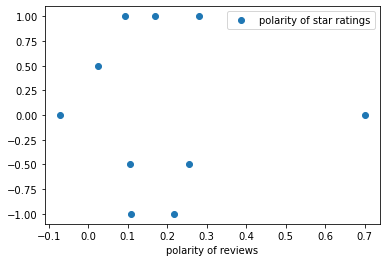

In [497]:
import matplotlib.pyplot as plt
df.plot(x='polarity of reviews', y='polarity of star ratings', style='o')



In [499]:
#let's find the correaltion between these columns.
import seaborn as sns
import matplotlib.pyplot as plt
df.corr()


,polarity of reviews,polarity of star ratings
polarity of reviews,1.0000,-0.0318
polarity of star ratings,-0.0318,1.0000


From the above output we can examine that  both variables does not move in tandem. When one variable increases, the other decreases.


Hence, there is negative correlation between star ratings and reviews of customers. 

